<a href="https://colab.research.google.com/github/Rajnishphe/PH421--Computational-Chemistry/blob/main/Molecular_structure_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook provides a short overview of different molecular representation methods.

Install RDKit which is an Open-Source Cheminformatics Software and py3Dmol which is a molecule visualiser.

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 21.7 MB/s eta 0:00:00


In [2]:
!pip install py3Dmol

In [3]:
#import all the modules needed for running this.
import py3Dmol
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import DataStructs
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

1.1. Working with SMILES
When we have SMILES string, we can use MolFromSmiles to render the molecule. Keep in mind that the SMILES doesn't contain the atomic coordinates and thus RdKit generates them while drawing the molecules.

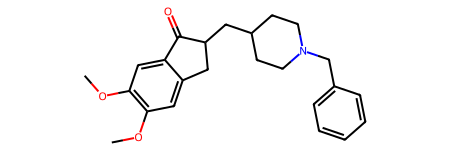

In [4]:
# drawing structure from a SMILES
donz = Chem.MolFromSmiles('COC1=C(C=C2C(=C1)CC(C2=O)CC3CCN(CC3)CC4=CC=CC=C4)OC')
donz

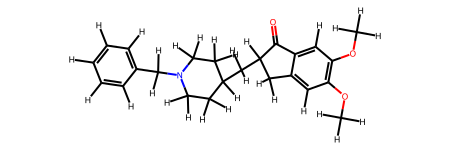

In [5]:
# Add hydrigens to the structure.
donzH = Chem.AddHs(donz)
donzH

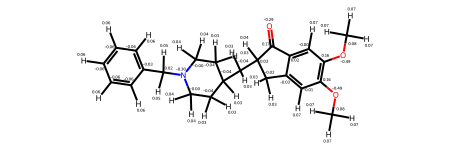

In [6]:
# Caluculate and display Gasteiger Charges for each atom
AllChem.ComputeGasteigerCharges(donzH)
donzH

donzH_charges = Chem.Mol(donzH)
for at in donzH_charges.GetAtoms():
    lbl = '%.2f'%(at.GetDoubleProp("_GasteigerCharge"))
    at.SetProp('atomNote',lbl)
donzH_charges

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

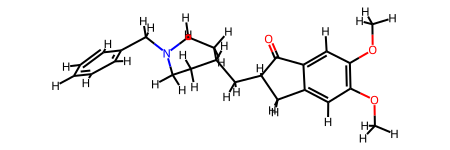

In [7]:
# Render a molecule in 3D
AllChem.EmbedMolecule(donzH)
rdkit.Chem.Draw.IPythonConsole.ipython_3d = True  # enable py3Dmol inline visualization
donzH

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

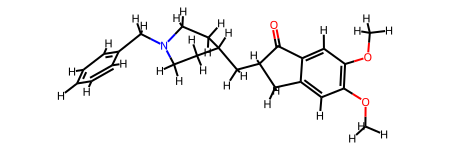

In [8]:
# Optmise the geometry using MMFF.
AllChem.MMFFOptimizeMolecule(donzH)
rdkit.Chem.Draw.IPythonConsole.ipython_3d = True  # enable py3Dmol inline visualization
donzH

1.2. Reading a molfile

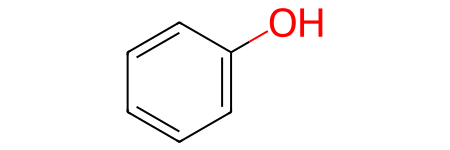

In [9]:
molblock = """phenol
  Mrv1682210081607082D

  7  7  0  0  0  0            999 V2000
   -0.6473    1.0929    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3618    0.6804    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3618   -0.1447    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6473   -0.5572    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0671   -0.1447    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0671    0.6804    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7816    1.0929    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  2  0  0  0  0
  3  4  1  0  0  0  0
  4  5  2  0  0  0  0
  5  6  1  0  0  0  0
  1  6  2  0  0  0  0
  6  7  1  0  0  0  0
M  END
"""
m = Chem.MolFromMolBlock(molblock)
m

[05:04:44] Molecule does not have explicit Hs. Consider calling AddHs()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

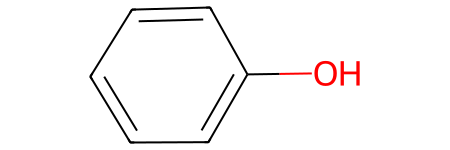

In [10]:
# Render a molecule in 3D
AllChem.EmbedMolecule(m)
rdkit.Chem.Draw.IPythonConsole.ipython_3d = True  # enable py3Dmol inline visualization
m

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

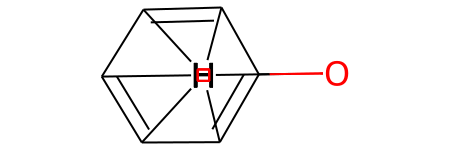

In [12]:
# Add hydrigens to the structure.
mH = Chem.AddHs(m)
mH

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

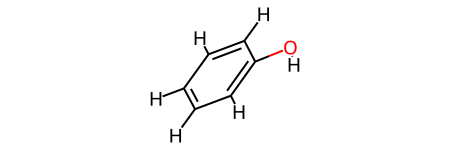

In [13]:
# Optimise the geometry to generate low energy structure.
AllChem.MMFFOptimizeMolecule(mH)
rdkit.Chem.Draw.IPythonConsole.ipython_3d = True  # enable py3Dmol inline visualization
mH

1.3. Reading a PDB file (Protein data bank)

In [24]:
viewer = py3Dmol.view(query='pdb:1EVE')
viewer.setStyle({'cartoon':{'color': 'spectrum'}})
#viewer.addSurface(py3Dmol.VDW,{'opacity':0.9,'color':'white'})

# select by distance
selection = {'resn':'E20', 'chain':'A', 'byres':'true', 'expand': 5}

# set styles
viewer.setStyle(selection,{'stick':{'colorscheme':'orangeCarbon'}})
viewer.setStyle({'resn': 'E20'},{'stick': {'colorscheme': 'greenCarbon'}})
viewer.zoomTo(selection)
viewer.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.